In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Construct a tf.data.Dataset
ds = tfds.load('lfw', split='train', shuffle_files=True, batch_size=32)

print(ds)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/13233 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/lfw/incomplete.N41QT4_0.1.0/lfw-train.tfrecord*...:   0%|          | 0/132…

Dataset lfw downloaded and prepared to /root/tensorflow_datasets/lfw/0.1.0. Subsequent calls will reuse this data.
<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, 250, 250, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(None,), dtype=tf.string, name=None)}>


In [ ]:
def get_shapes(pair_dict):
  x = pair_dict['image']
  y = pair_dict['label']

  return {'shape' : x.shape}

# mapped = ds.map(get_shapes)

labels = {}

for pair_dict in ds:
  label_arr= pair_dict['label']

  for label in label_arr:
    label = label.numpy().decode("utf-8")
    labels[label] = labels.get(label, 0) + 1

<Figure size 640x480 with 0 Axes>

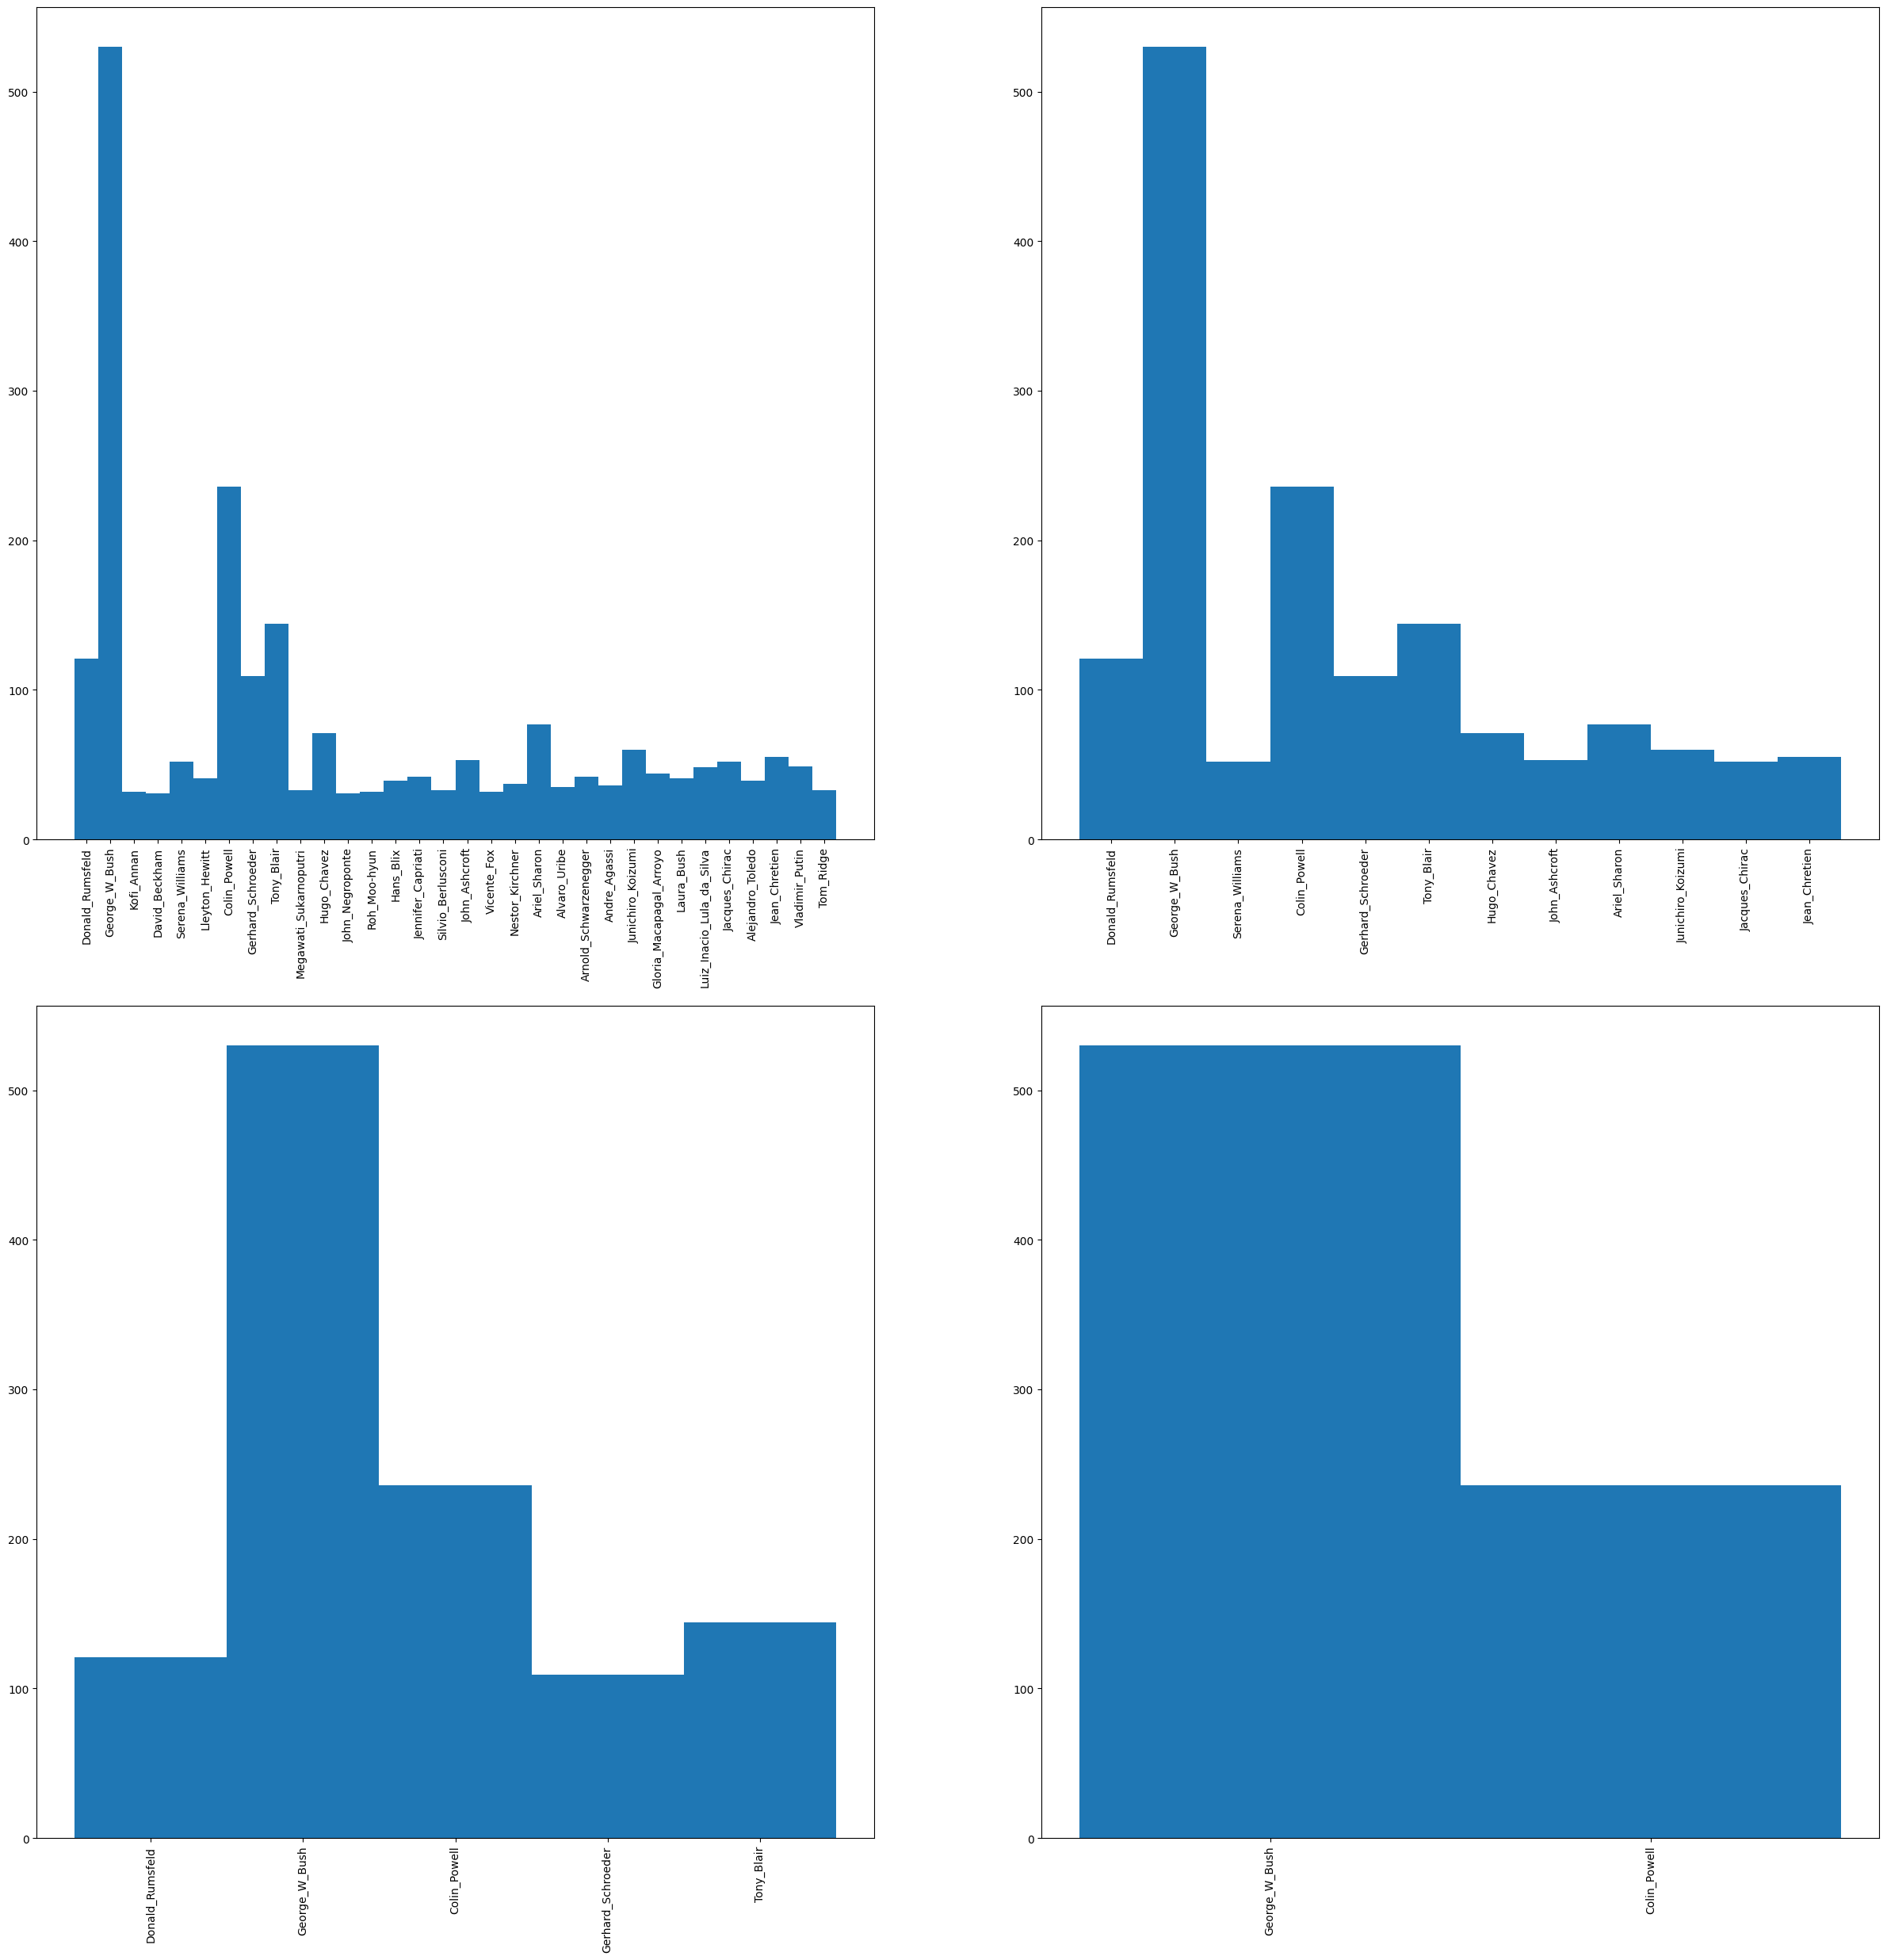

In [ ]:
def visualize_ids_with_threshold(threshold, ax):
  labels_dict = dict(filter(lambda tup: tup[1] > threshold, labels.items()))
  lfw_labels, counts = zip(*labels_dict.items())

  ax.tick_params(axis='x', labelrotation=90)
  ax.bar(list(lfw_labels), list(counts), width=1.0)

plt.tight_layout()

thres = [30, 50, 100, 200]
fig, axes = plt.subplots(2, 2, figsize=(30, 30))

for index, th in enumerate(thres):
  visualize_ids_with_threshold(th, axes[index // 2][index % 2])

fig.savefig('plot.png')

In [ ]:
from urllib.request import urlopen

target_url = 'https://www.cs.columbia.edu/CAVE/databases/pubfig/download/lfw_attributes.txt'

# with open('lfw.txt', 'w') as file:
with urlopen(target_url) as response:
  print(response)
  rows = response.read().decode().split('\n')
  labels = rows[1].split('\t')[1:]

  dataset = [row.split('\t') for row in rows[2:]]

  print(labels)
  print(dataset[0])

label_indexer = {}

for index, label in enumerate(labels):
  label_indexer[label] = index

print(label_indexer)

print(len(dataset))

['person', 'imagenum', 'Male', 'Asian', 'White', 'Black', 'Baby', 'Child', 'Youth', 'Middle Aged', 'Senior', 'Black Hair', 'Blond Hair', 'Brown Hair', 'Bald', 'No Eyewear', 'Eyeglasses', 'Sunglasses', 'Mustache', 'Smiling', 'Frowning', 'Chubby', 'Blurry', 'Harsh Lighting', 'Flash', 'Soft Lighting', 'Outdoor', 'Curly Hair', 'Wavy Hair', 'Straight Hair', 'Receding Hairline', 'Bangs', 'Sideburns', 'Fully Visible Forehead', 'Partially Visible Forehead', 'Obstructed Forehead', 'Bushy Eyebrows', 'Arched Eyebrows', 'Narrow Eyes', 'Eyes Open', 'Big Nose', 'Pointy Nose', 'Big Lips', 'Mouth Closed', 'Mouth Slightly Open', 'Mouth Wide Open', 'Teeth Not Visible', 'No Beard', 'Goatee', 'Round Jaw', 'Double Chin', 'Wearing Hat', 'Oval Face', 'Square Face', 'Round Face', 'Color Photo', 'Posed Photo', 'Attractive Man', 'Attractive Woman', 'Indian', 'Gray Hair', 'Bags Under Eyes', 'Heavy Makeup', 'Rosy Cheeks', 'Shiny Skin', 'Pale Skin', "5 o' Clock Shadow", 'Strong Nose-Mouth Lines', 'Wearing Lipstick

In [ ]:
import ast

def fetch_data_guider():
  all_zero_arr = []
  similiar_fets = []

  with open('seperate_fets.txt', 'r') as f:
    while True:
      line = f.readline()

      if not line:
        break

      line = line.strip()

      if '->' in line:
        index = line.find(' ->')
        line = line[:index]
        line = ast.literal_eval(line)
        all_zero_arr.append(True)
      else:
        line = ast.literal_eval(line)
        all_zero_arr.append(False)

      similiar_fets.append(line)

  return similiar_fets, all_zero_arr

In [ ]:
import numpy as np

fets, all_zero = fetch_data_guider()

In [ ]:
def get_distribution(similar, all_zero, other_label=None):
  indexes = []

  for fet_name in similar:
    indexes.append(label_indexer[fet_name])

  dist = {}
  for row in dataset:
    if len(row) != 75:
      continue

    scores = np.array([float(row[index]) for index in indexes])

    if scores.max() > 0:
      max_label = similar[scores.argmax()]
      dist[max_label] = dist.get(max_label, 0) + 1
    elif all_zero:
      map_label = 'Other' if other_label is None else other_label
      dist[map_label] = dist.get(map_label, 0) + 1
    else:
      max_label = similar[scores.argmax()]
      dist[max_label] = dist.get(max_label, 0) + 1


  return dist

In [ ]:
print(all_zero[0])
get_distribution(fets[0], all_zero[0], other_label='Female')

True


{'Male': 10181, 'Female': 2962}

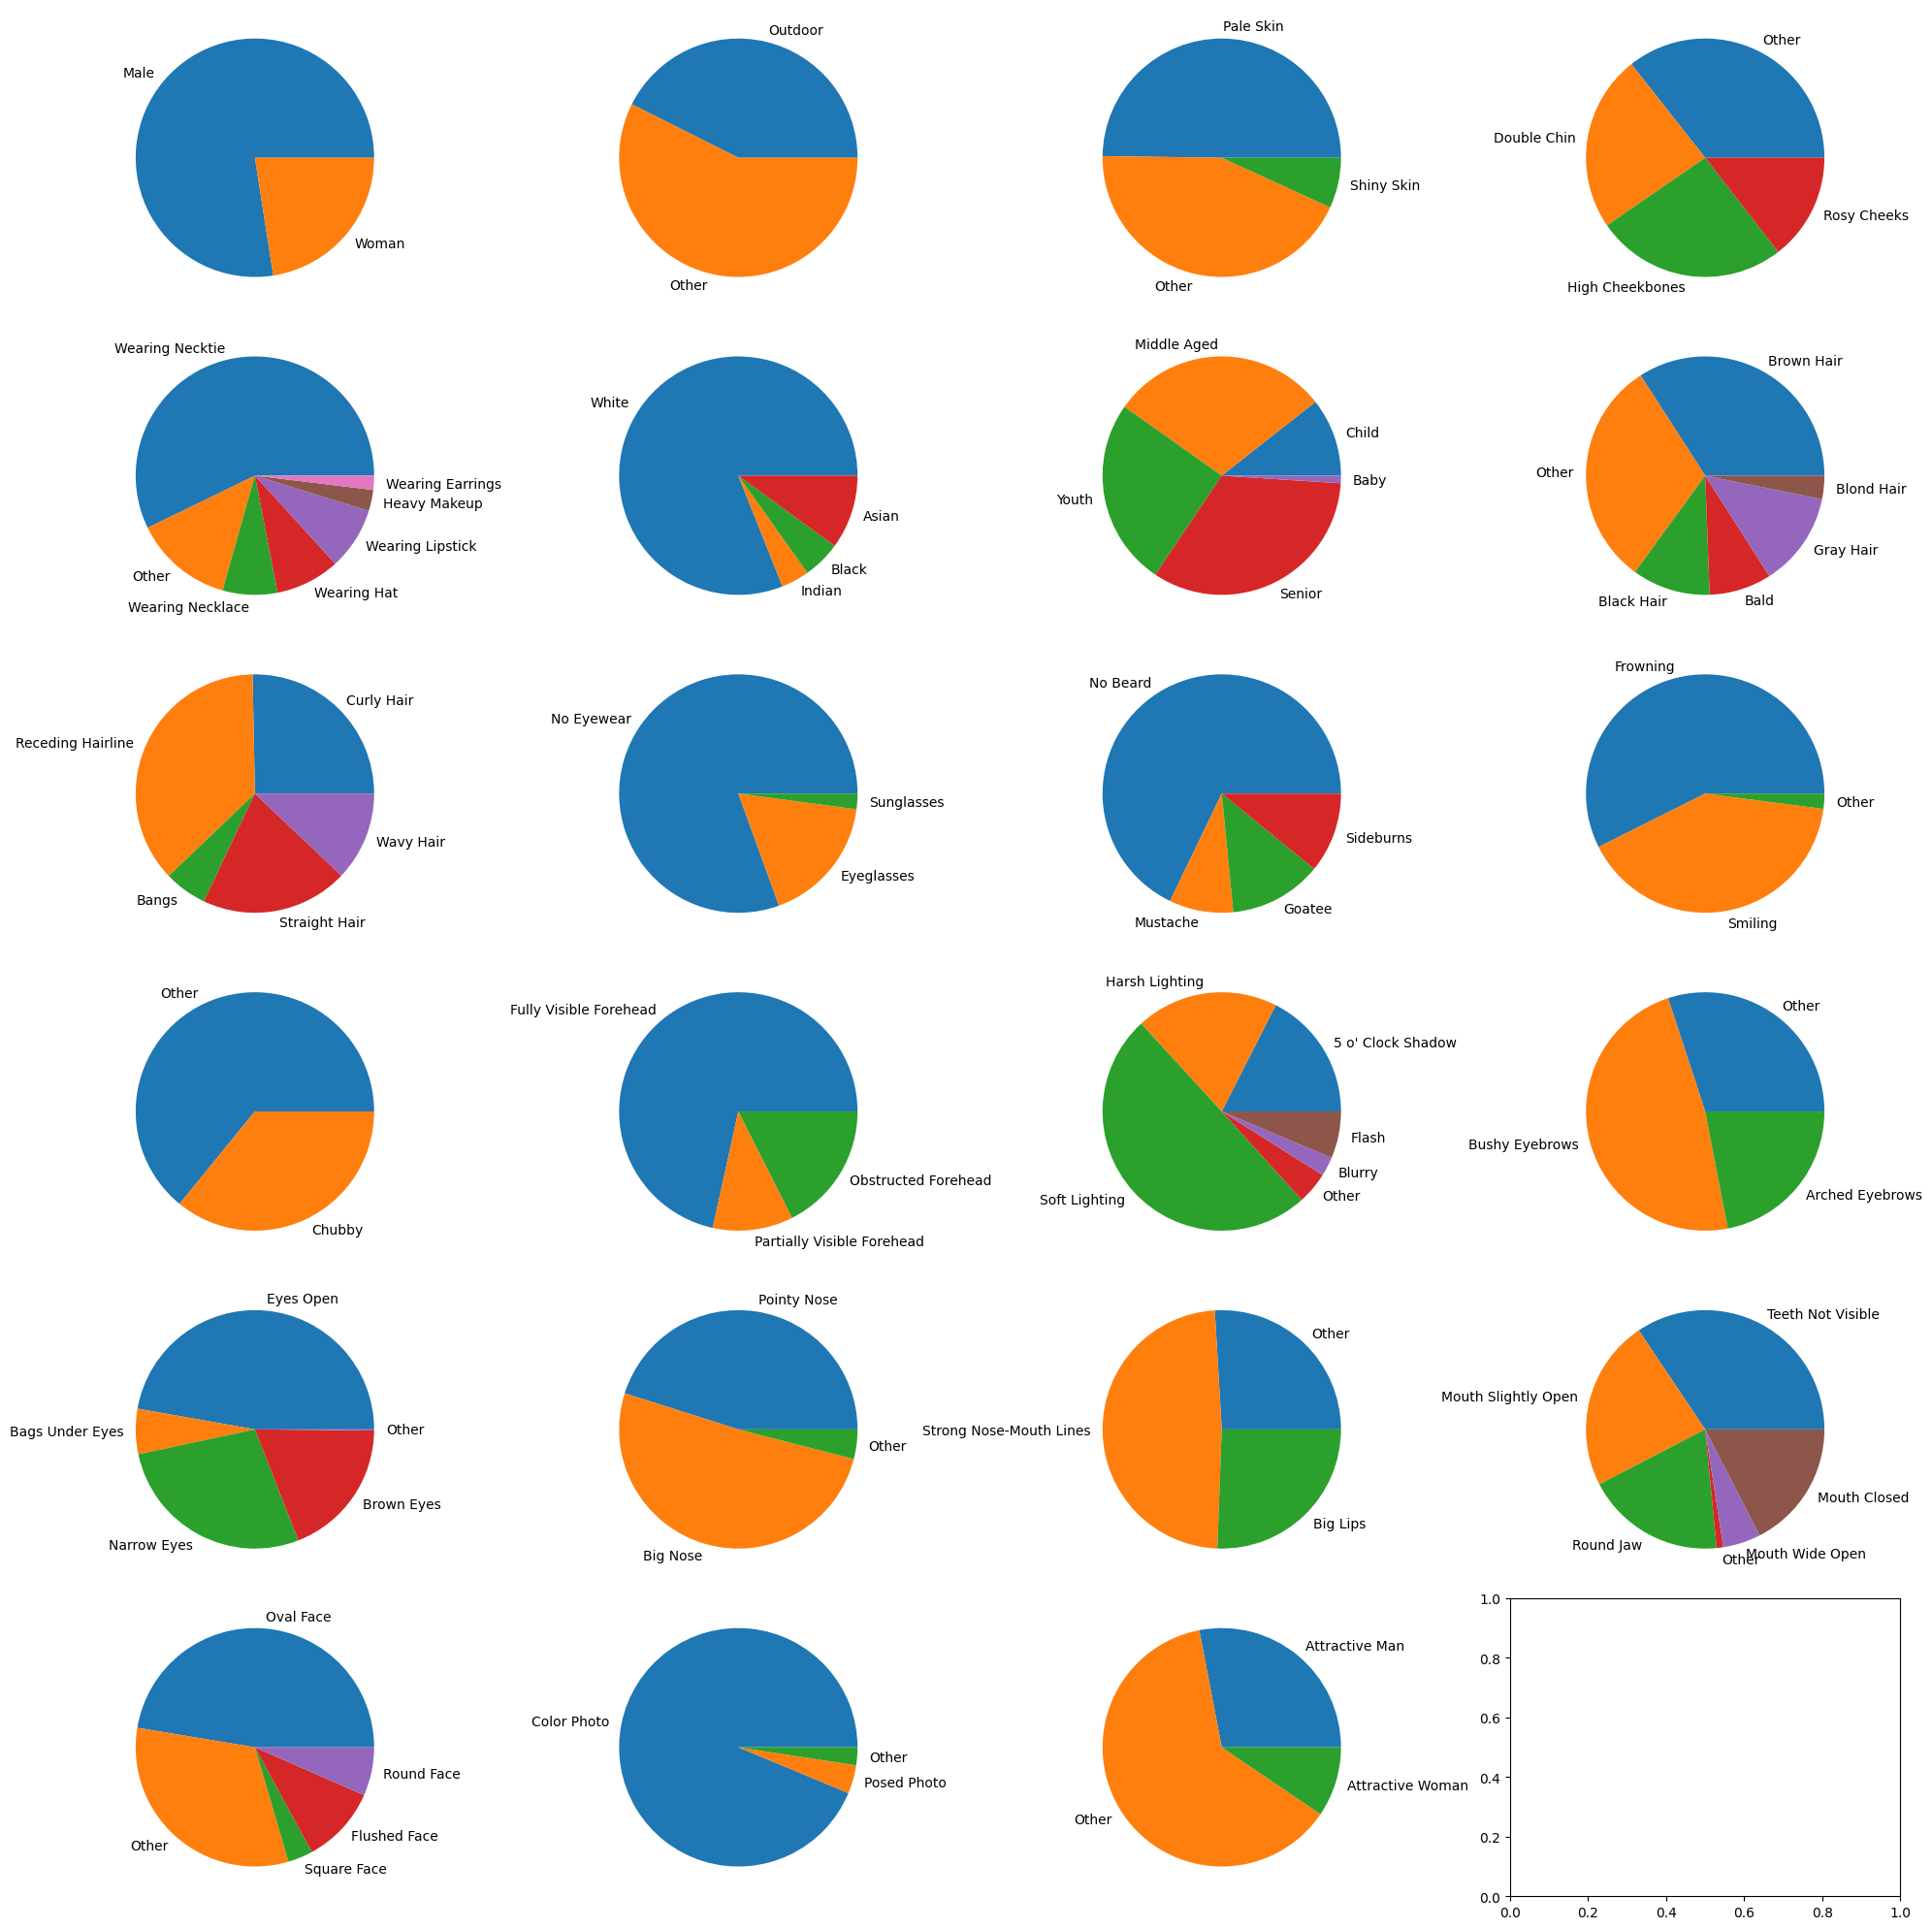

In [ ]:
import math
from matplotlib import pyplot as plt

def draw_pie(data, axis):
  labels = []
  sizes = []

  for x, y in data.items():
      labels.append(x)
      sizes.append(y)

  # Plot
  axis.pie(sizes, labels=labels)

fets_cnt = len(fets)

fig, axes = plt.subplots(int(math.ceil(fets_cnt / 4)), 4, figsize=(20, 20))

for i in range(len(fets)):
  draw_pie(get_distribution(fets[i], all_zero[i], other_label= 'Woman' if i == 0 else None), axes[i // 4][i % 4])

plt.tight_layout()
plt.show()
fig.savefig('lfw.png')